<div class="head0">
    <div class="head0__name">
        Examples for grid module
    </div>
    <div class="head0__note">
        Construction of multidimensional Chebyshev grid.
    </div>
</div>

In [1]:
import numpy as np
from fpcross import init_jupyter, Grid

init_jupyter()

Start |  3:28PM MSK on Oct 05, 2019 |
-------------------------------------


In [2]:
GR = Grid(n=[5, 7], l=[[-4., 3.], [-1., 2.]])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimension        : 2
D1               : Poi 5   | Min -4.000 | Max 3.000  |
D2               : Poi 7   | Min -1.000 | Max 2.000  |
------------------


In [3]:
GR = Grid(n=5, l=[[-4., 3.], [-1., 2.]])
GR.info()

------------------ Grid
Kind             : Chebyshev
Dimension        : 2
D1               : Poi 5   | Min -4.000 | Max 3.000  |
D2               : Poi 5   | Min -1.000 | Max 2.000  |
------------------


In [5]:
GR = Grid(n=5, l=[-4., 3.])
GR.info()

IndexError: Invalid shape for grid parameters.

In [9]:
x = np.array([[1, 2, 3], [1., 2., 4.]])
len(x)

2

In [10]:
x.shape

(2, 3)

In [ ]:
GR.plot()

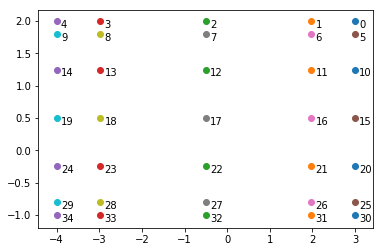

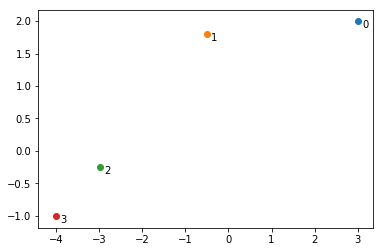

In [2]:
GR.plot(I=[
    [0, 2, 3, 4],
    [0, 1, 4, 6]
])